# Why reuse Y2

The sample Young 1 (Y1) has a clearly different distribution of cells in every 3D model.
As this is a 21 young old female and the next sample is a 32 years old male, we want to check if age is that important or if there is something wrong with the young sample 1. Unfortunately we do not have another 21 yoar old female, but Y2 is a 25 year old male.
So out of curiosity we will use this rather shady sample.
It is expected to have a lot of cells that are not our traget cells, as the data has more cells than wrer put into the process.

The reported problem with Y2 is that there was 'white failiure' on the sequencing chip. And in the end there were way too manny cells detected.

In [4]:
import scvelo as scv
import loompy
import scanpy
#import scanpy.api
import igraph
import phate
import glob, os
import pandas as pd
import os
import re
import subprocess
from collections import Counter
import numpy as np

In [2]:
files = glob.glob("../[MB]*/*/*.loom")
files

[]

In [3]:
loompy.combine(files, output_file="Hongze_healthy_2020_10_merged.loom" )

ValueError: The input file list was empty

In [ ]:
adata = scv.read("Hongze_healthy_2020_10_merged.loom" )

In [ ]:
adata

In [ ]:
adata.var_names_make_unique()
adata.X.shape

In [ ]:
regex = re.compile('_[AGCT]*$')

sname = [ regex.sub( '', cellid ) for cellid in adata.obs.index ]
np.unique(sname)

In [ ]:
adata.obs['sname'] = sname
adata

In [ ]:
set(adata.obs['sname'])

In [ ]:
del adata.layers['matrix']
adata

In [ ]:
RP = re.compile('^RP[SL]')
MT = re.compile('^MT')
def test(x):
    r = True
    if RP.match(x) or MT.match(x): 
        r = False
    return (r)

    
OK = [ test(x) for x in adata.var.index ]
freq = Counter(OK)
print(freq)
adata.X.shape

In [ ]:
adata._inplace_subset_var( np.array(OK) )
adata

In [ ]:
scanpy.pp.filter_cells(adata, min_counts=1000 )
adata

## without Y2 and min 100 genes we had 22543 cells

In [ ]:
scanpy.pp.downsample_counts(adata, counts_per_cell= 1000 )

In [ ]:
scanpy.pp.filter_genes(adata, min_counts=10 )
adata

In [ ]:
ofile = "Hongze_healthy_2020_10_downsampled_1000.h5ad"

if os.path.exists(ofile):
    os.remove(ofile)
adata.write(ofile)

# Go on with var gene set

In [ ]:
scv.pp.filter_genes_dispersion(adata, n_top_genes=3000)
scv.pp.log1p(adata)
adata.X.shape

In [ ]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scanpy.tl.umap(adata,n_components=3)
scanpy.tl.louvain(adata)

In [ ]:
scv.pl.scatter(adata, color='sname', figsize =(10,8), colorbar=True, legend_loc='right margin', palette='viridis')

In [ ]:
scv.pl.scatter(adata, color='JUN', figsize =(10,8))

In [ ]:
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata,basis='umap')

In [ ]:
scanpy.api.tl.phate(adata, n_components=3)
scv.tl.velocity_embedding(adata,basis='phate')

In [ ]:
ofile = "Hongze_healthy_2020_10_downsampled_1000_var_3000.h5ad"
if os.path.exists(ofile):
    os.remove(ofile)
adata.write(ofile)
#if not(os.path.exists(ofile)):
#    adata.write(ofile)

In [ ]:
scanpy.tl.louvain( adata, resolution =1.0 )
scv.pl.scatter(adata, color='sname', figsize =(15,12))

In [ ]:
scanpy.tl.louvain( adata, resolution =1.0,key_added='louvain1' )
scv.pl.scatter(adata, color='louvain1', figsize =(15,12))

In [ ]:
scanpy.tl.louvain( adata, resolution =2.0,key_added='louvain2' )
scv.pl.scatter(adata, color='louvain2', figsize =(15,12))

In [ ]:
scanpy.tl.louvain( adata, resolution =3.0,key_added='louvain3' )
scv.pl.scatter(adata, color='louvain3', figsize =(15,12))

In [ ]:
scanpy.tl.louvain( adata, resolution =4.0,key_added='louvain4' )
scv.pl.scatter(adata, color='louvain4', figsize =(15,12))

In [ ]:
scanpy.tl.louvain( adata, resolution = 5.0,key_added='louvain5' )
scv.pl.scatter(adata, color='louvain5', figsize =(15,12))

In [ ]:
scv.tl.velocity_clusters(adata, vkey='velocity', resolution=1)
adata.obs['velocity_clusters1'] = adata.obs['velocity_clusters']
scv.pl.scatter(adata, color='velocity_clusters1', figsize =(15,12))

In [ ]:
scv.tl.velocity_clusters(adata, vkey='velocity', resolution=2)
adata.obs['velocity_clusters2'] = adata.obs['velocity_clusters']
scv.pl.scatter(adata, color='velocity_clusters2', figsize =(15,12))

In [ ]:
scv.tl.velocity_clusters(adata, vkey='velocity', resolution=0.7)
adata.obs['velocity_clusters.7'] = adata.obs['velocity_clusters']
scv.pl.scatter(adata, color='velocity_clusters.7', figsize =(15,12))

In [ ]:
scv.pl.velocity_embedding(adata,density=0.6,figsize =(15,12), arrow_length=5,color='velocity_clusters.7' )

In [ ]:
scv.pl.velocity_embedding(adata,density=0.6,figsize =(15,12), arrow_length=5,color='velocity_clusters2' )

In [ ]:
ofile = "Hongze_healthy_2020_10_downsampled_1000_var_3000_Overclustered.h5ad"
if not(os.path.exists(ofile)):
    adata.write(ofile)

# add some clusters

Today we need to add more clusters and hence we load the data here!
2020 10 15

In [5]:
ofile = "Hongze_healthy_2020_10_downsampled_1000_var_3000_Overclustered.h5ad"
adata = scv.read( ofile )
adata

AnnData object with n_obs × n_vars = 25067 × 3000
    obs: 'TotalUMIs', 'sname', 'n_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain', 'velocity_self_transition', 'louvain1', 'louvain2', 'louvain3', 'louvain4', 'louvain5', 'velocity_clusters', 'velocity_clusters1', 'velocity_clusters2', 'velocity_clusters.7'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'louvain', 'louvain1_color

In [ ]:
def toVR_SelectionTable (adata, values_key, drc_name ):
    df = pd.DataFrame ( { 
   #     'cells': adata.obs.index, 
        'cols': [ adata.uns[f"{values_key}_colors"][int(x)] for x in adata.obs[values_key].values], 
        'drc': [ drc_name for x in adata.obs.index], 
        'groupID': adata.obs[values_key]
    } )
    df = df.sort_values(by=['groupID'])
    df.to_csv(f"Selection_{values_key}.txt", sep="\t", header=False)
    return (f"saved as Selection_{values_key}.txt")

In [ ]:
toVR_SelectionTable( adata, 'velocity_clusters1', 'RF_stats_umap')
toVR_SelectionTable( adata, 'velocity_clusters.7', 'RF_stats_umap')
toVR_SelectionTable( adata, 'velocity_clusters2', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain1', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain2', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain3', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain4', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain5', 'RF_stats_umap')

In [ ]:
scanpy.tl.louvain( adata, resolution = 7.0,key_added='louvain7' )
scv.pl.scatter(adata, color='louvain7', figsize =(15,12))

In [ ]:
scanpy.tl.louvain( adata, resolution = 10.0,key_added='louvain10' )
scv.pl.scatter(adata, color='louvain10', figsize =(15,12))

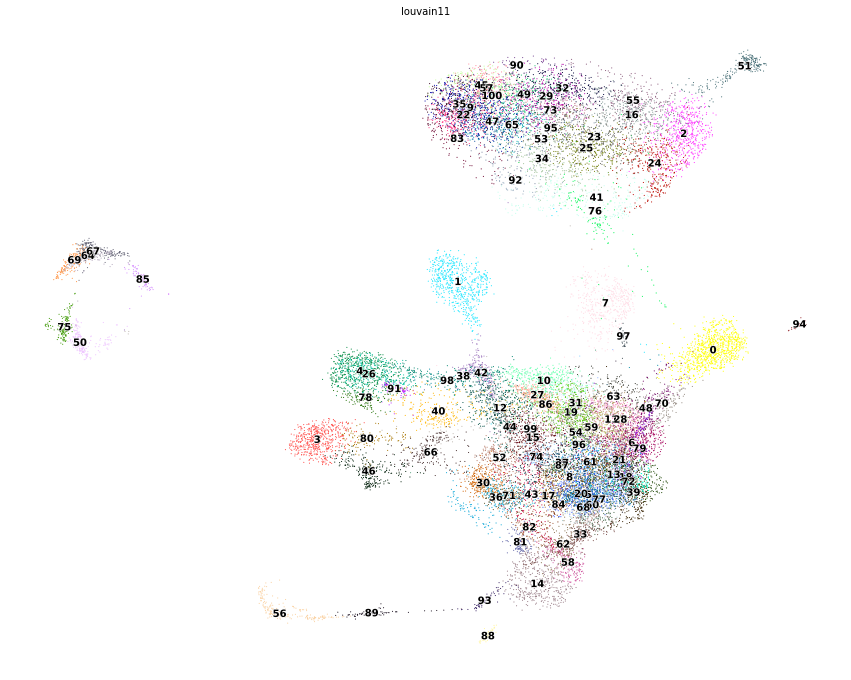

In [193]:
scanpy.tl.louvain( adata, resolution = 11.0,key_added='louvain11' )
scv.pl.scatter(adata, color='louvain11', figsize =(15,12))

In [ ]:
scanpy.tl.louvain( adata, resolution = 12.0,key_added='louvain12' )
scv.pl.scatter(adata, color='louvain12', figsize =(15,12))

In [ ]:
toVR_SelectionTable( adata, 'louvain7', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain10', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain11', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain12', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain14', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain15', 'RF_stats_umap')
toVR_SelectionTable( adata, 'louvain16', 'RF_stats_umap')


In [ ]:
os.getcwd()

# FINALLY A GOOD ONE!

the louvain11 seams to be OK now. So what I need to do here is to create mean expression values over the clusters and do a histogram and a correlation matrix.

In [ ]:
grouped_obs_mean( adata, 'louvain11' )

## function source
https://github.com/theislab/scanpy/issues/181

In [8]:
def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64))
    return out

In [ ]:
mean_data.shape

In [ ]:
cor = mean_data.corr()
cor

## source
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [226]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

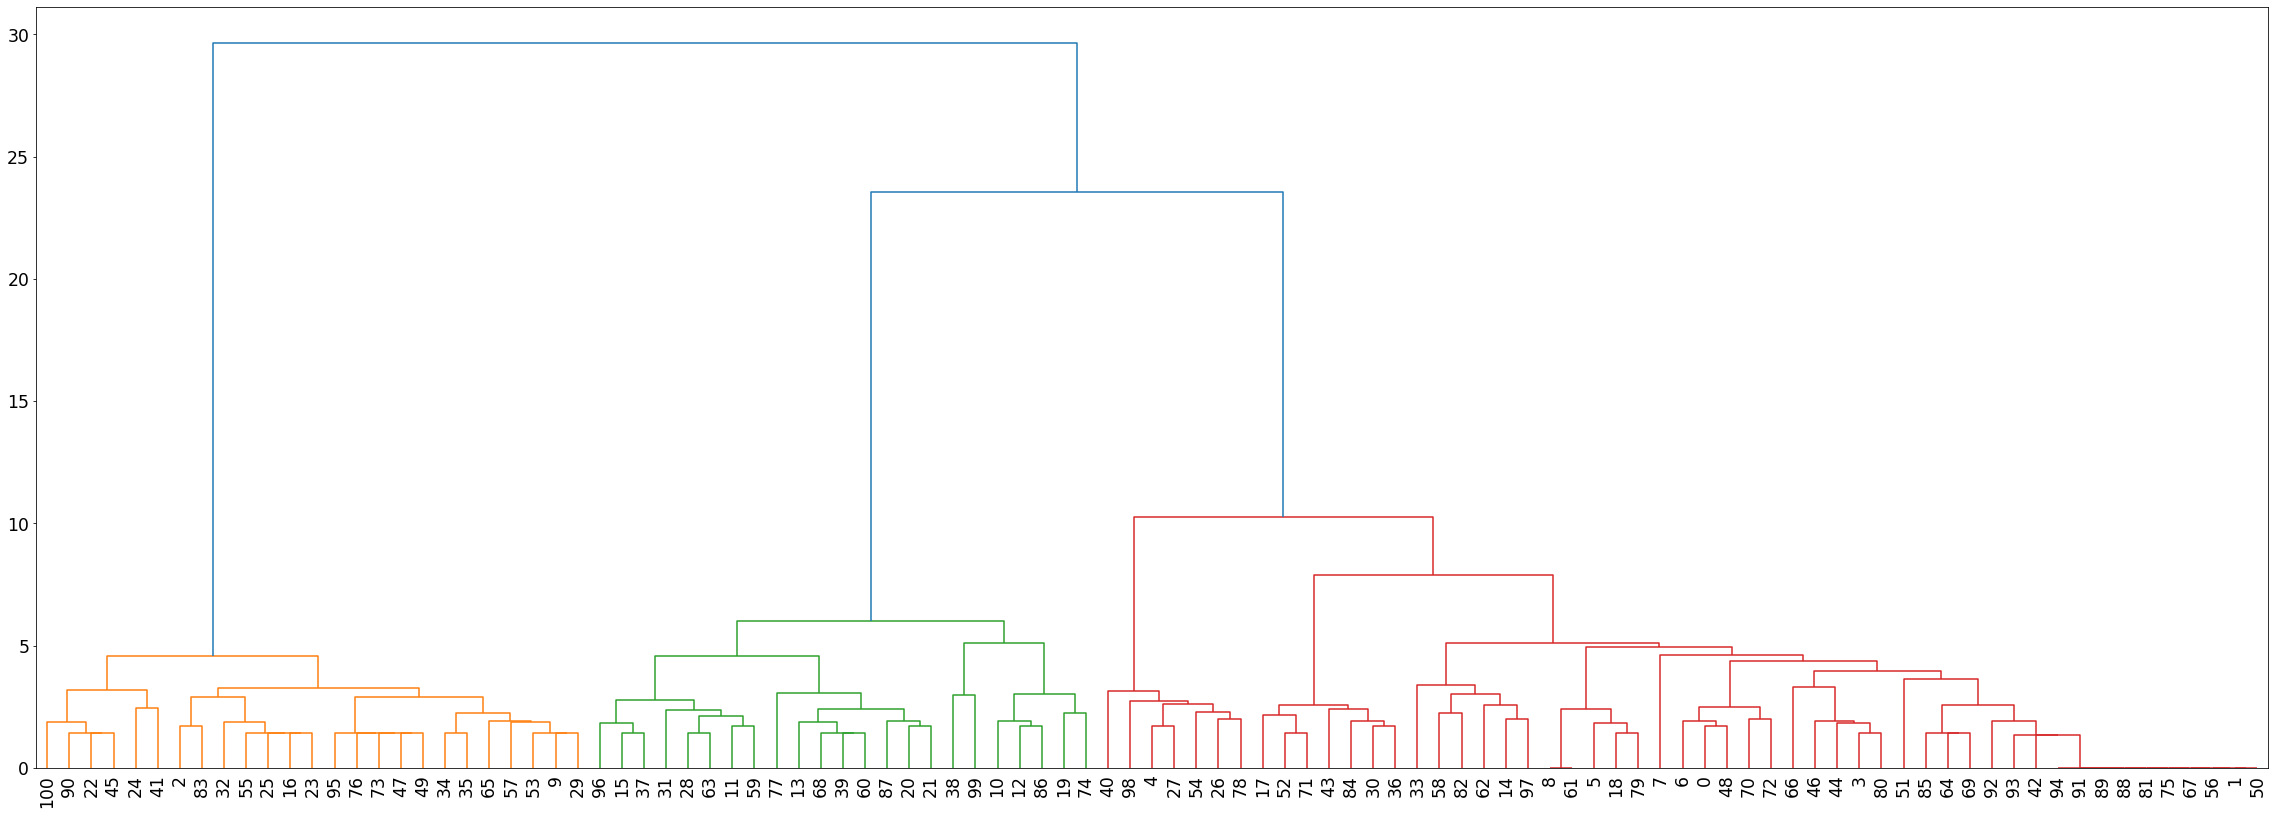

In [27]:
mean_data = grouped_obs_mean( adata, 'louvain11' )
cor = mean_data.corr()

linked = linkage(cor, 'ward')
plt.figure(figsize=(40, 14))
den = dendrogram( linked )
plt.tick_params( labelsize='xx-large' )
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
cluster = AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='ward')

In [30]:
cluster

AgglomerativeClustering(n_clusters=40)

In [31]:
cluster

AgglomerativeClustering(n_clusters=40)

In [32]:
den['ivl']

['100',
 '90',
 '22',
 '45',
 '24',
 '41',
 '2',
 '83',
 '32',
 '55',
 '25',
 '16',
 '23',
 '95',
 '76',
 '73',
 '47',
 '49',
 '34',
 '35',
 '65',
 '57',
 '53',
 '9',
 '29',
 '96',
 '15',
 '37',
 '31',
 '28',
 '63',
 '11',
 '59',
 '77',
 '13',
 '68',
 '39',
 '60',
 '87',
 '20',
 '21',
 '38',
 '99',
 '10',
 '12',
 '86',
 '19',
 '74',
 '40',
 '98',
 '4',
 '27',
 '54',
 '26',
 '78',
 '17',
 '52',
 '71',
 '43',
 '84',
 '30',
 '36',
 '33',
 '58',
 '82',
 '62',
 '14',
 '97',
 '8',
 '61',
 '5',
 '18',
 '79',
 '7',
 '6',
 '0',
 '48',
 '70',
 '72',
 '66',
 '46',
 '44',
 '3',
 '80',
 '51',
 '85',
 '64',
 '69',
 '92',
 '93',
 '42',
 '94',
 '91',
 '89',
 '88',
 '81',
 '75',
 '67',
 '56',
 '1',
 '50']

## Reorder the clusters in this order!

I need a selection file with this order of samples!


In [228]:
def toVR_SelectionTable (adata, values_key, drc_name, order=None ):
    df = pd.DataFrame ( { 
   #     'cells': adata.obs.index, 
        'cols': [ adata.uns[f"{values_key}_colors"][int(x)] for x in adata.obs[values_key].values], 
        'drc': [ drc_name for x in adata.obs.index], 
        'groupID': adata.obs[values_key]
    } )
    if order is not None:
        df['Order'] = pd.Categorical( df['groupID'], order )
        df = df.sort_values(by='Order')
    else:
        df = df.sort_values(by=['groupID'])
    df[['cols', 'drc', 'groupID']].to_csv(f"Selection_{values_key}_reordered.txt", sep="\t", header=False)
    return (f"saved as Selection_{values_key}_reordered.txt")

In [ ]:
toVR_SelectionTable( adata, 'louvain11', 'umap', order=den['ivl'])

In [191]:
ofile = "Hongze_healthy_2020_10_downsampled_1000_var_3000_Overclustered.h5ad"
adata = scv.read( ofile )
adata

AnnData object with n_obs × n_vars = 25067 × 3000
    obs: 'TotalUMIs', 'sname', 'n_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain', 'velocity_self_transition', 'louvain1', 'louvain2', 'louvain3', 'louvain4', 'louvain5', 'velocity_clusters', 'velocity_clusters1', 'velocity_clusters2', 'velocity_clusters.7'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'louvain', 'louvain1_color

In [ ]:
from palantir.utils import (
        run_diffusion_maps,
        determine_multiscale_space,
        run_magic_imputation,
    )

In [ ]:
df = pd.DataFrame(adata.obsm['X_pca'], index=adata.obs_names)

In [ ]:
dm_res = run_diffusion_maps(
        data_df=df, n_components=10, knn=30, alpha=0.0,
    )

In [ ]:
ms_data = determine_multiscale_space(dm_res=dm_res, n_eigs=4 )
ms_data

In [ ]:
(
    adata.obsm['X_palantir_diff_comp'],
    adata.uns['palantir_EigenValues'],
    adata.obsp['palantir_diff_op'],
    adata.obsm['X_palantir_multiscale'],
) = (
    dm_res['EigenVectors'].to_numpy(),
    dm_res['EigenValues'].to_numpy(),
    dm_res['T'],
     ms_data.to_numpy(),
)
adata

In [ ]:
scv.tl.velocity_embedding(adata,basis='palantir_diff_comp')

In [ ]:
scv.tl.velocity_embedding(adata,basis='palantir_multiscale')

In [ ]:
ofile = "Hongze_healthy_2020_10_downsampled_1000_var_3000_Overclustered_palantir.h5ad"
#if not(os.path.exists(ofile)):
adata.write(ofile)

# The palantir output is rather unusable.

Probably the imputation is crucial in getting something out of this module (wich in turn makes it unlikely to give good results - right?

In [ ]:
imp_df = run_magic_imputation(
    data=adata.to_df(),
    dm_res=dm_res,
    n_steps=3
)
adata.layers['palantir_imp'] = imp_df

But this imputated data is never used - hence I have to stop here. Palantir is inferior to phate clustering!
And it does not work together with velocity either. Strange...


In [194]:
adata.obs['louvain11_merged.9'] = adata.obs['louvain11']

In [223]:

def mergeClosest( adata, group = 'louvain11_merged.9', cut = 0.9 ):
    print (str(len(Counter(adata.obs[group])))+ " -", end=" ")
    df = grouped_obs_mean( adata, group )
    df = df.corr()
    for i in range(0,df.shape[0]):
        df.at[df.columns[i],df.columns[i]] = 0
    #print("processing groups")
    #print (df)
    for i in range( 0, len(df.columns)):
        i = df.columns[i]
        col = df[i]
        #print ( "max value="+ str( max( col )) )
        if max( col ) >= cut:
            gr = np.array(adata.obs[group])
            m = [df.columns[a] for a in range(0, len(col)) if col[a] == max(col) ]
            m = m[0]
            #print ("max value="+str(max[col])+ " merge " + str(m) + " to "+ str(i)+".")
            for x in range(0,len(adata.obs[group])):
                    if str(gr[x]) == i:
                        #print ( "changed" + str(x)+ " change " + gr[x]  + " to "+ str(m))
                        gr[x] = m
            #type(gr)
            #print("finished")
            adata.obs[group] = gr
            return True
    print ( "no cluster did match to any other cluster with cor > "+ str(cut) )
    return False



In [224]:
while ( mergeClosest( adata ) ):
    print ( "working")


merging 60 clusters
working
merging 59 clusters
working
merging 58 clusters
working
merging 57 clusters
working
merging 56 clusters
working
merging 55 clusters
working
merging 54 clusters
working
merging 53 clusters
working
merging 52 clusters
working
merging 51 clusters
working
merging 50 clusters
working
merging 49 clusters
working
merging 48 clusters
working
merging 47 clusters
working
merging 46 clusters
working
merging 45 clusters
working
merging 44 clusters
working
merging 43 clusters
working
merging 42 clusters
working
merging 41 clusters
working
merging 40 clusters
no cluster di match to any other cluster with cor > 0.9


## The clusers need to range from 0 to 39 (n=40)

At the moment they range from 1 to 100

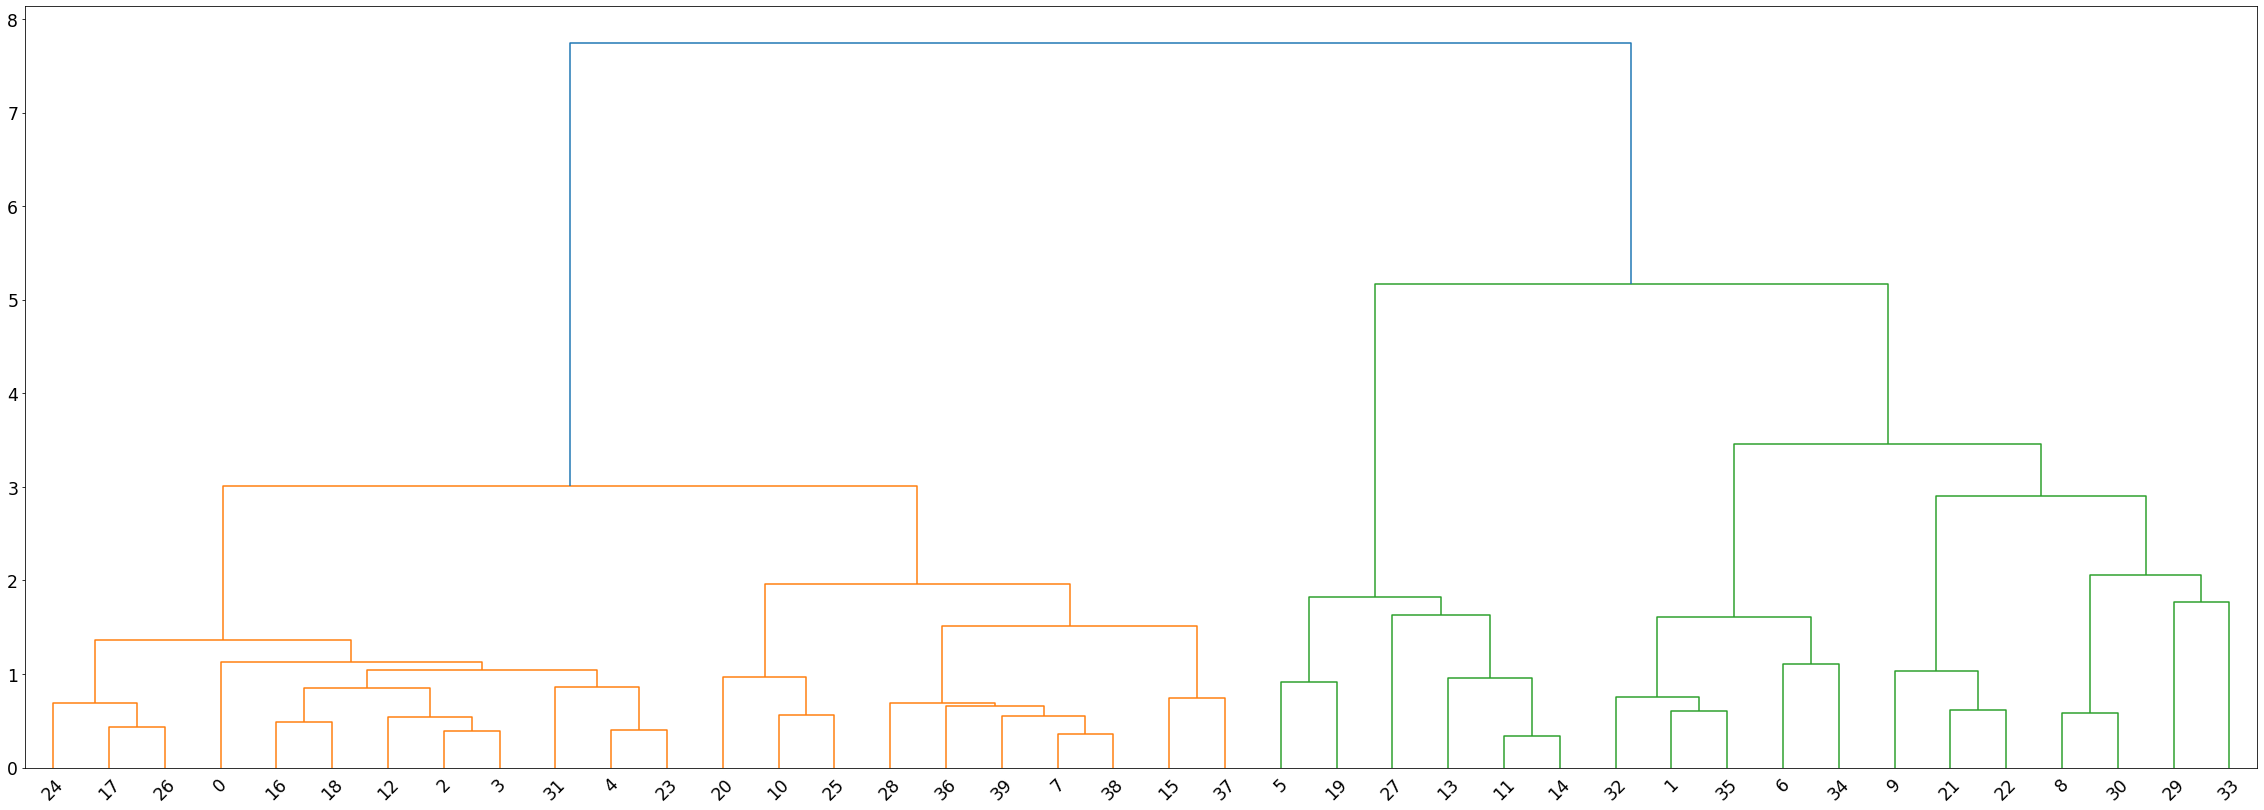

In [227]:
mean_data = grouped_obs_mean( adata, 'louvain11_merged.9' )
cor = mean_data.corr()

linked = linkage(cor, 'ward')
plt.figure(figsize=(40, 14))
den = dendrogram( linked )
plt.tick_params( labelsize='xx-large' )
plt.show()

In [241]:
group = 'louvain11_merged.9'
gr = np.array(adata.obs[group])
n = 0
for i in set(adata.obs[group]):
    for x in range(0,len(adata.obs[group])):
        if adata.obs[group][x] == i:
            gr[x] = n
    n = n +1
adata.obs[group+'_renamed'] = gr

In [242]:
set(adata.obs[group+'_renamed'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39}

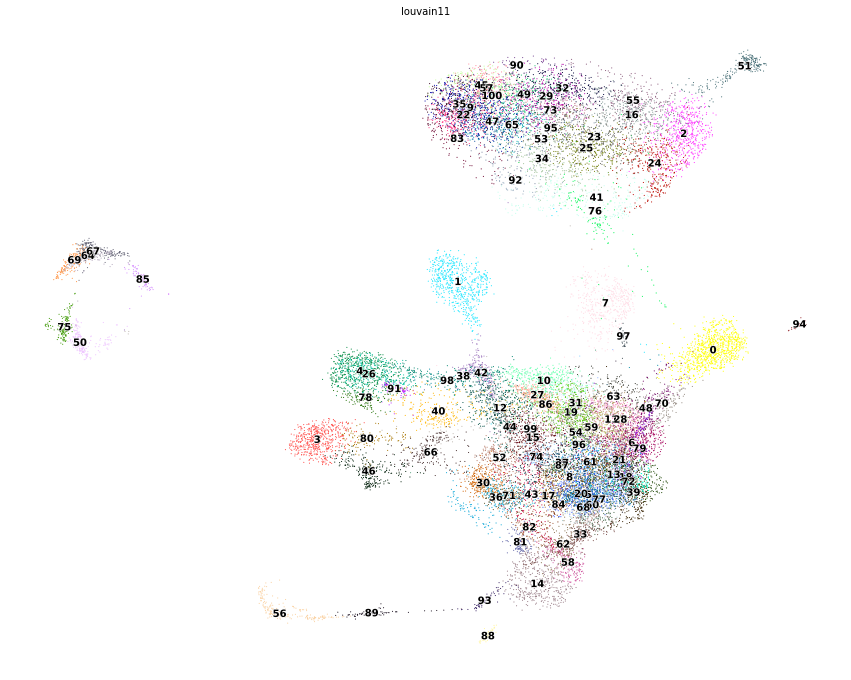

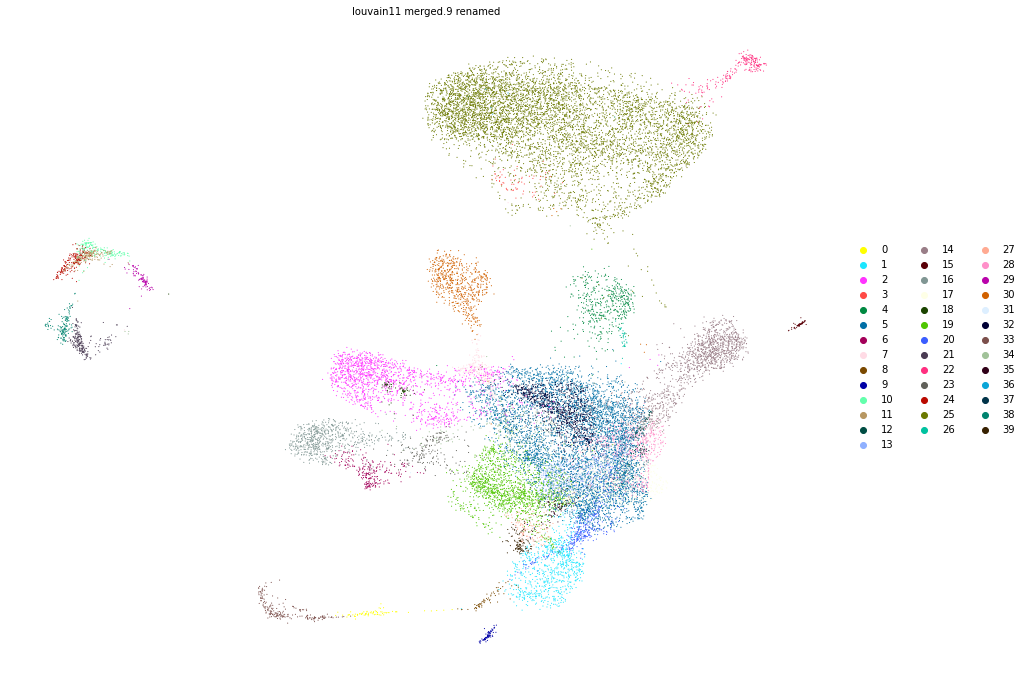

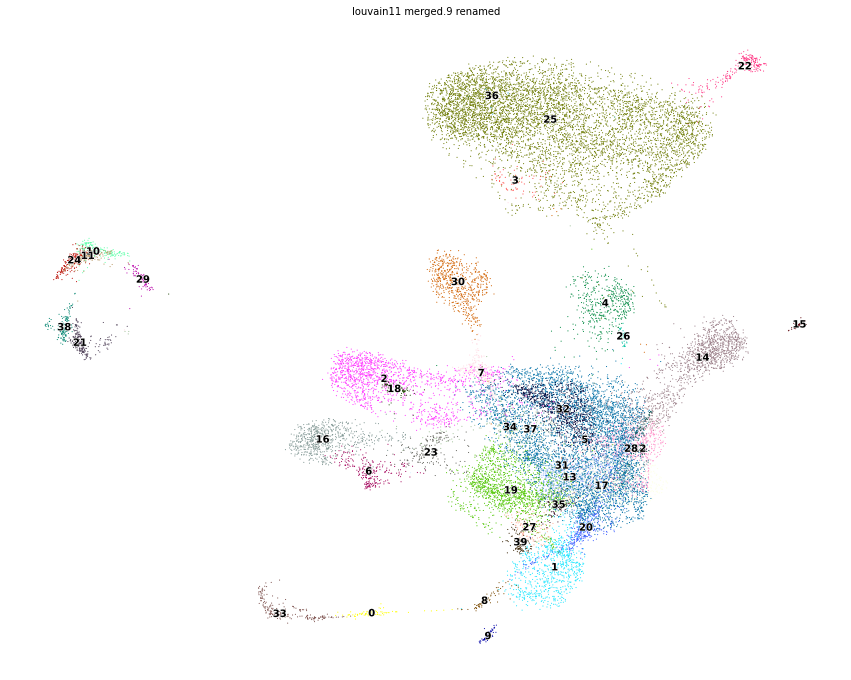

In [247]:
scv.pl.scatter(adata, color='louvain11', figsize =(15,12))

scv.pl.scatter(adata, color='louvain11_merged.9_renamed', figsize =(15,12), legend_loc='topright')

scv.pl.scatter(adata, color='louvain11_merged.9_renamed', figsize =(15,12))

In [244]:
toVR_SelectionTable( adata, 'louvain11_merged.9_renamed', 'umap', order=den['ivl'])

'saved as Selection_louvain11_merged.9_renamed_reordered.txt'

In [250]:
adata.obs['louvain11_merged.95'] = adata.obs['louvain11']
while ( mergeClosest( adata, group = 'louvain11_merged.95', cut = 0.95 ) ):
    print ( "working")

merging 101 clusters
working
merging 100 clusters
working
merging 99 clusters
working
merging 98 clusters
working
merging 97 clusters
working
merging 96 clusters
working
merging 95 clusters
working
merging 94 clusters
working
merging 93 clusters
working
merging 92 clusters
working
merging 91 clusters
working
merging 90 clusters
working
merging 89 clusters
working
merging 88 clusters
working
merging 87 clusters
working
merging 86 clusters
working
merging 85 clusters
working
merging 84 clusters
working
merging 83 clusters
working
merging 82 clusters
working
merging 81 clusters
working
merging 80 clusters
working
merging 79 clusters
working
merging 78 clusters
working
merging 77 clusters
working
merging 76 clusters
working
merging 75 clusters
working
merging 74 clusters
working
merging 73 clusters
working
merging 72 clusters
working
merging 71 clusters
working
merging 70 clusters
working
merging 69 clusters
working
merging 68 clusters
working
merging 67 clusters
working
merging 66 cluster